In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
!ls drive

In [1]:
import os
os.chdir("/content/drive/My Drive/AutoEncoders/mnist_Autoencoder")
!pwd


/content/drive/My Drive/AutoEncoders/mnist_Autoencoder


In [2]:
!ls

autoencoder_activity_regularizer_eklenmis.h5
mnist_Autoencoder_uygulama.ipynb
mnist_deep_Autoencoder_uygulama.ipynb


In [0]:
!pip install -q keras

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
#mümkün olan en basit autoencoder oluşturumu
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


"""
input_img=Input(shape=(784,))#input layer hazır

encoded=Dense(32,activation="relu")(input_img)#ilk encoder leyarı ilk hidden layerı oluşturcaz
                                         #sondaki parantezin içine bie önceki katmanı yazarak nöronları birbirine bağlıyoruz
encoded=Dense(16,activation="relu")(encoded)

decoded=Dense(32,activation="relu")(encoded)

decoded=Dense(784,activation="sigmoid")(decoded)#outputta genelde sigmoid kullanılıyor

autoencoder=Model(input_img,decoded) #inputttan başlıuo decodede kadar gidiyo dedik


autoencoder.compile(optimizer='rmsprop',loss="binary_crossentropy")#hiperparametreler"""

'\ninput_img=Input(shape=(784,))#input layer hazır\n\nencoded=Dense(32,activation="relu")(input_img)#ilk encoder leyarı ilk hidden layerı oluşturcaz\n                                         #sondaki parantezin içine bie önceki katmanı yazarak nöronları birbirine bağlıyoruz\nencoded=Dense(16,activation="relu")(encoded)\n\ndecoded=Dense(32,activation="relu")(encoded)\n\ndecoded=Dense(784,activation="sigmoid")(decoded)#outputta genelde sigmoid kullanılıyor\n\nautoencoder=Model(input_img,decoded) #inputttan başlıuo decodede kadar gidiyo dedik\n\n\nautoencoder.compile(optimizer=\'rmsprop\',loss="binary_crossentropy")#hiperparametreler'

In [17]:
hist=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1012 - val_loss: 0.1010
Epoch 2/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1009 - val_loss: 0.1007
Epoch 3/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1008 - val_loss: 0.0994
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1006 - val_loss: 0.1014
Epoch 5/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1005 - val_loss: 0.0984
Epoch 6/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1005 - val_loss: 0.1006
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1002 - val_loss: 0.0992
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1002 - val_loss: 0.0985
Epoch 9/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1000 - val_loss: 0.0

In [0]:
autoencoder.save_weights("autoencoder_ann_birdenfazlakatman.h5")

In [19]:
print(hist.history.keys())

dict_keys(['val_loss', 'loss'])


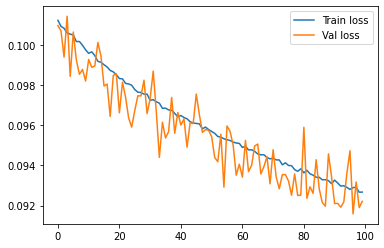

In [27]:
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()# labelların gözükmesini sağlamak
plt.show()

In [0]:
import json,codecs 
with open("autoencoder_hist.json","w") as f:
    json.dump(hist.history,f)

In [0]:
with codecs.open("autoencoder_hist.json","r",encoding="utf-8") as f:
    n=json.loads(f.read())

dict_keys(['val_loss', 'loss'])


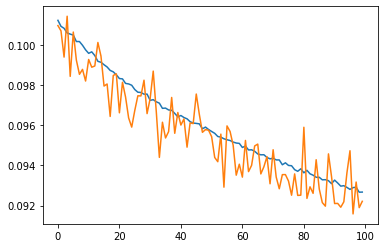

In [31]:
print(n.keys())
plt.plot(n["loss"],label="Train loss")
plt.plot(n["val_loss"],label="Val loss")

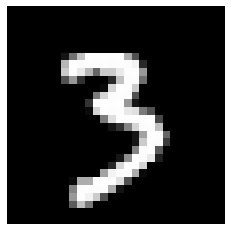

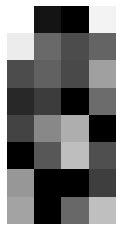

In [44]:
encoder=Model(input_img,encoded)
encoded_img=encoder.predict(x_test)

plt.imshow(x_test[30].reshape(28,28))
plt.axis("off")
plt.show()
plt.figure()
plt.imshow(encoded_img[30].reshape(8,4))
plt.axis("off")
plt.show()

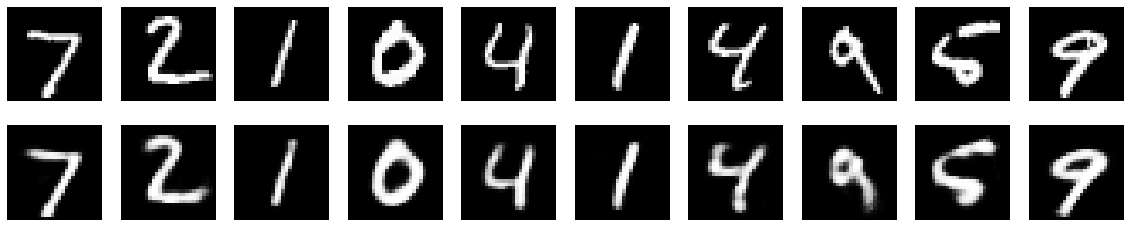

In [36]:
decoded_imgs=autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off") 

plt.show()